In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - x*4 + 5

In [3]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

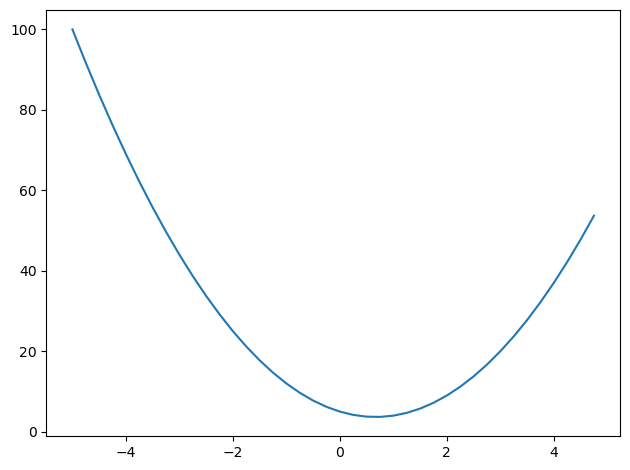

In [4]:
# plt.figure(figsize=(10,6))
plt.plot(xs, ys)
plt.tight_layout()
plt.show()

# Definition of Differentiability

A function of a real variable $f(x)$ is **differentiable** at a point $a$ of its domain, if its domain contains an open interval containing $a$, and the limit

$$L = \lim_{h \to 0} \frac{f(a+h) - f(a)}{h}$$

exists and is finite.

## Notes:

- The limit $L$ is called the **derivative** of $f$ at $a$, denoted as $f'(a)$ or $\frac{df}{dx}\bigg|_{x=a}$
- The expression $\frac{f(a+h) - f(a)}{h}$ is called the **difference quotient**
- For the function to be differentiable at $a$, both the left-hand and right-hand limits must exist and be equal


In [5]:
h = 0.0000001
x = -3
(f(x + h) - f(x))/h

-21.999999688659955

In [6]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a * b + c
c += h
d2 = a * b + c
print("d1", d1)
print("d2", d2)
print("slope", (d2-d1)/h)

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [ ]:
class Value:
    def __init__(self, data, _children=()):
        self.data = data
        self._prev = set(_children)
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self.data, other))
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data,  (self.data, other))
        return out

a = Value(2)
b = Value(-3)
c = Value(10)
a * b + c

Value(data=4)